In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
election = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [3]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [4]:
election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
election= election.drop('Unnamed: 0',axis=1)

In [6]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [7]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
election.shape

(1525, 9)

In [9]:
dups=election.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
election[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [10]:
print("the no of rows ",election.shape[0]," ", "the no of colums ",election.shape[1])

the no of rows  1525   the no of colums  9


In [11]:
election.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [12]:
for feature in election.columns:
    if election[feature].dtype=='object':
           print(feature.upper() ," ",election[feature].nunique())
           print(election[feature].value_counts().sort_values())

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [13]:
election.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [14]:
def univariateAnalysis(column, nbins):

    
    plt.figure()
    ax=sns.boxplot(x=election[column])
    plt.show()

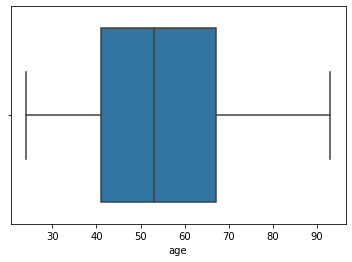

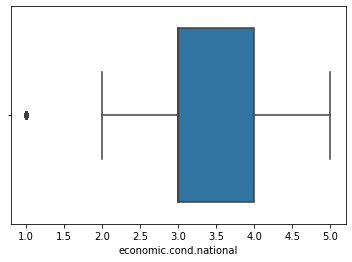

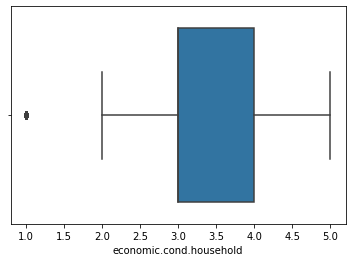

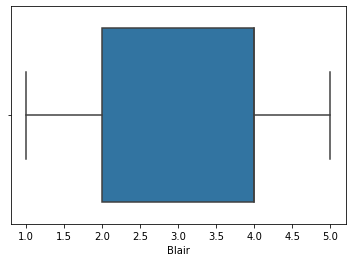

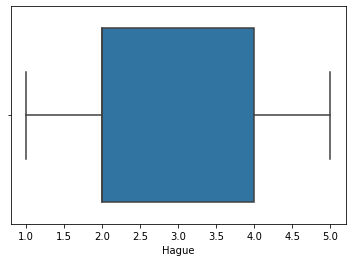

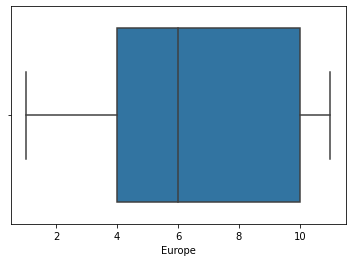

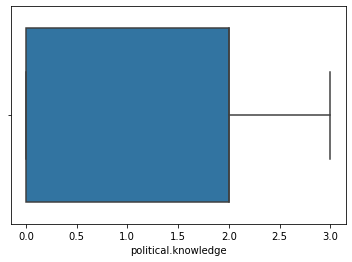

In [15]:
data = election.select_dtypes(include = ['float64', 'int64'])
data_col = list(data.columns.values)
len(data_col)

for x in data_col:
    univariateAnalysis(x, 20)

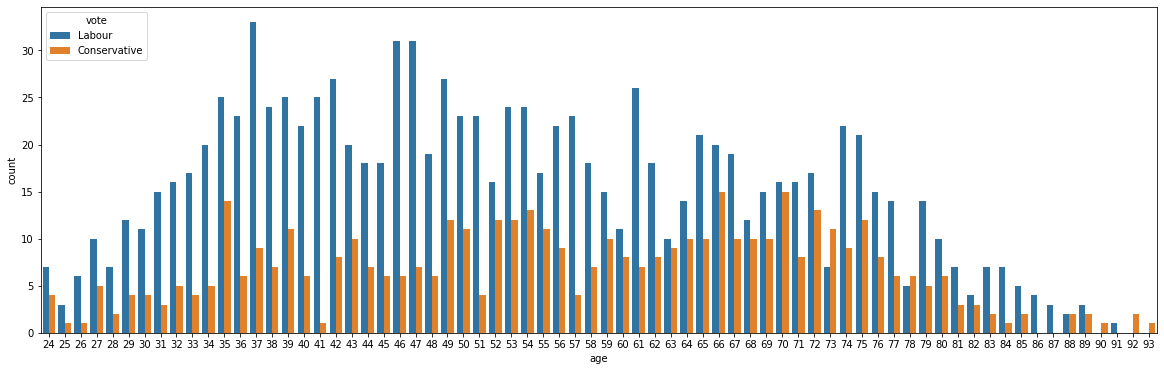

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(x='age', hue='vote', data=election)
plt.show()

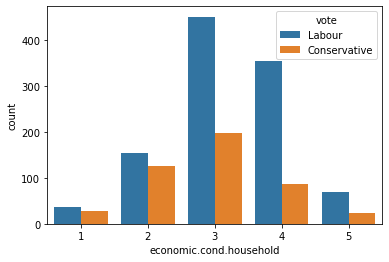

In [17]:
plt.figure()
sns.countplot(x='economic.cond.household', hue='vote', data=election)
plt.show()

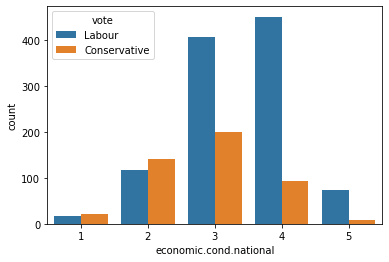

In [18]:
plt.figure()
sns.countplot(x='economic.cond.national', hue='vote', data=election)
plt.show()

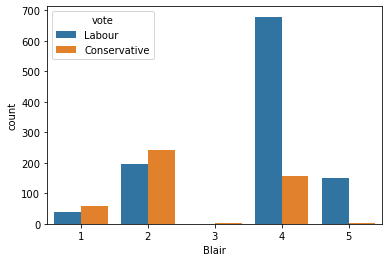

In [19]:
plt.figure()
sns.countplot(x='Blair', hue='vote', data=election)
plt.show()

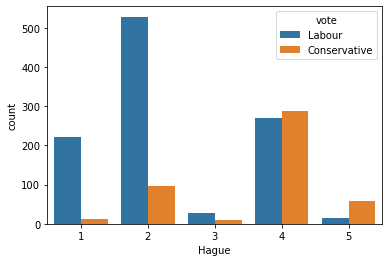

In [20]:
plt.figure()
sns.countplot(x='Hague', hue='vote', data=election)
plt.show()

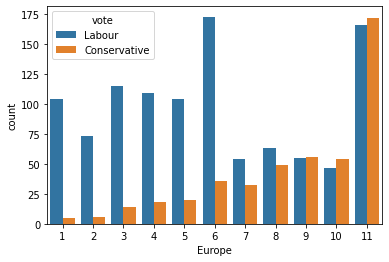

In [21]:
plt.figure()
sns.countplot(x='Europe', hue='vote', data=election)
plt.show()

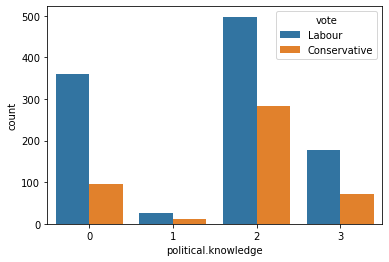

In [22]:
plt.figure()
sns.countplot(x='political.knowledge', hue='vote', data=election)
plt.show()

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


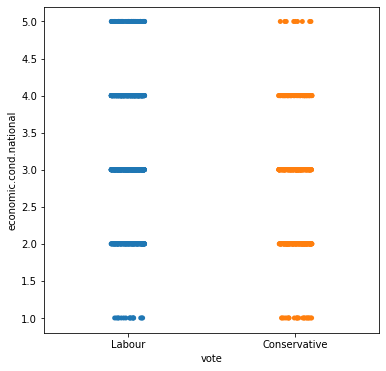

In [23]:
plt.figure(figsize=(6,6))
sns.stripplot(election["vote"], election['economic.cond.national'], jitter=True) 
plt.show()


/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


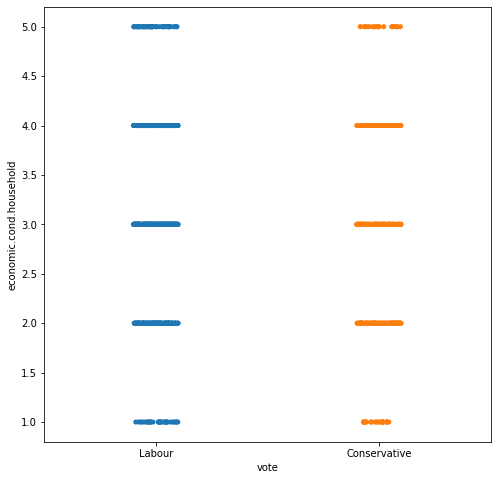

In [24]:
plt.figure(figsize=(8,8))
sns.stripplot(election["vote"], election['economic.cond.household'], jitter=True) 
plt.show()

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


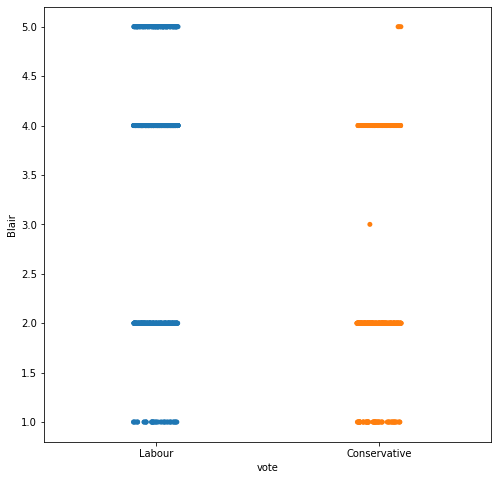

In [25]:
plt.figure(figsize=(8,8))
sns.stripplot(election["vote"], election['Blair'], jitter=True) 
plt.show()

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


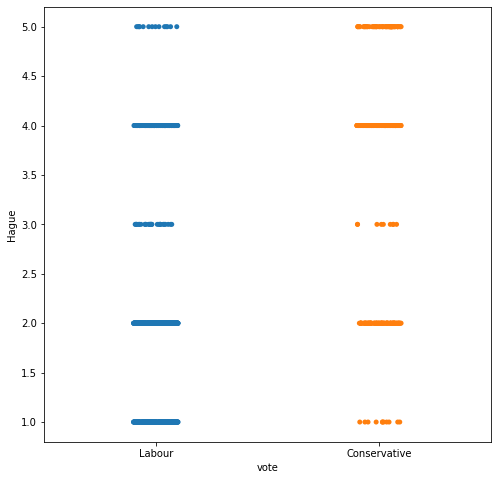

In [26]:
plt.figure(figsize=(8,8))
sns.stripplot(election["vote"], election['Hague'], jitter=True) 
plt.show()

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


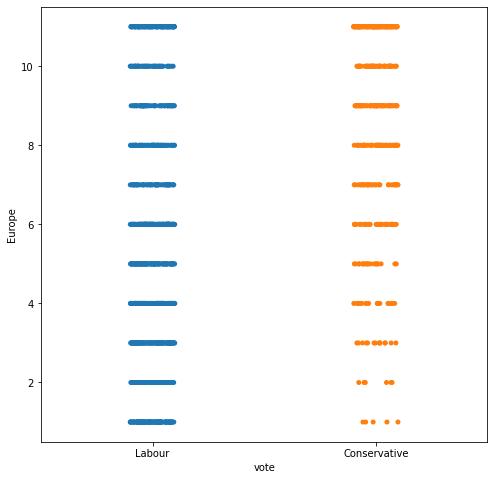

In [27]:
plt.figure(figsize=(8,8))
sns.stripplot(election["vote"], election['Europe'], jitter=True) 
plt.show()

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


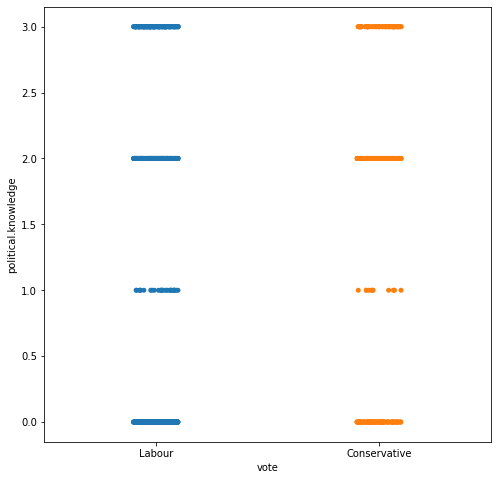

In [28]:
plt.figure(figsize=(8,8))
sns.stripplot(election["vote"], election['political.knowledge'], jitter=True) 
plt.show()

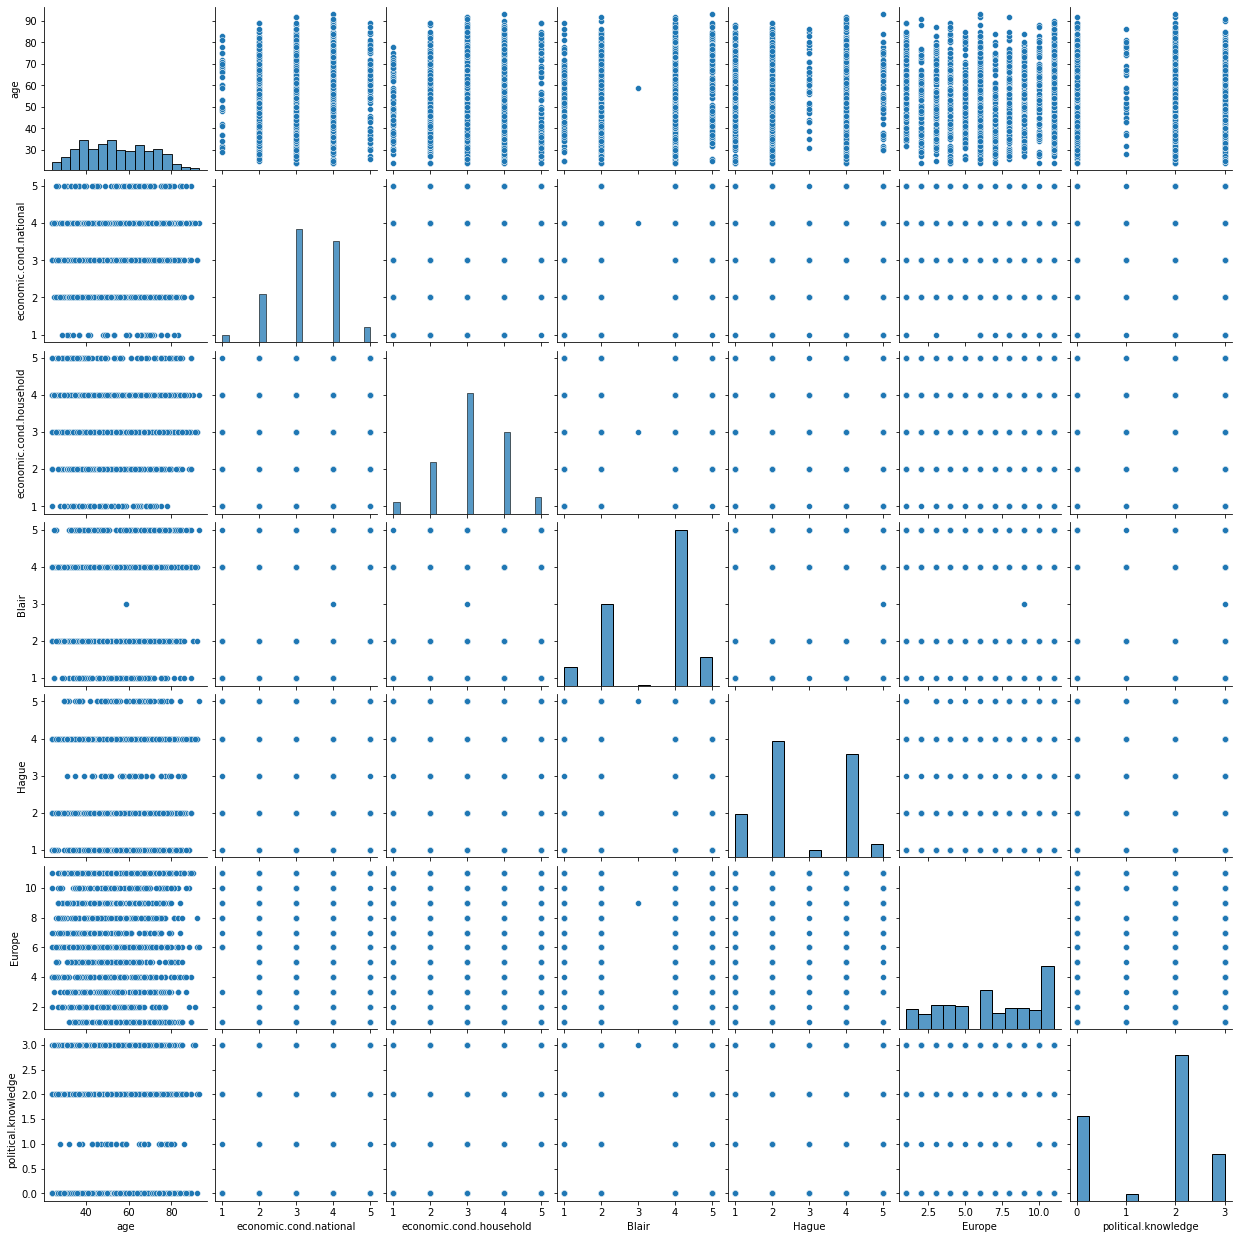

In [29]:
sns.pairplot(election)

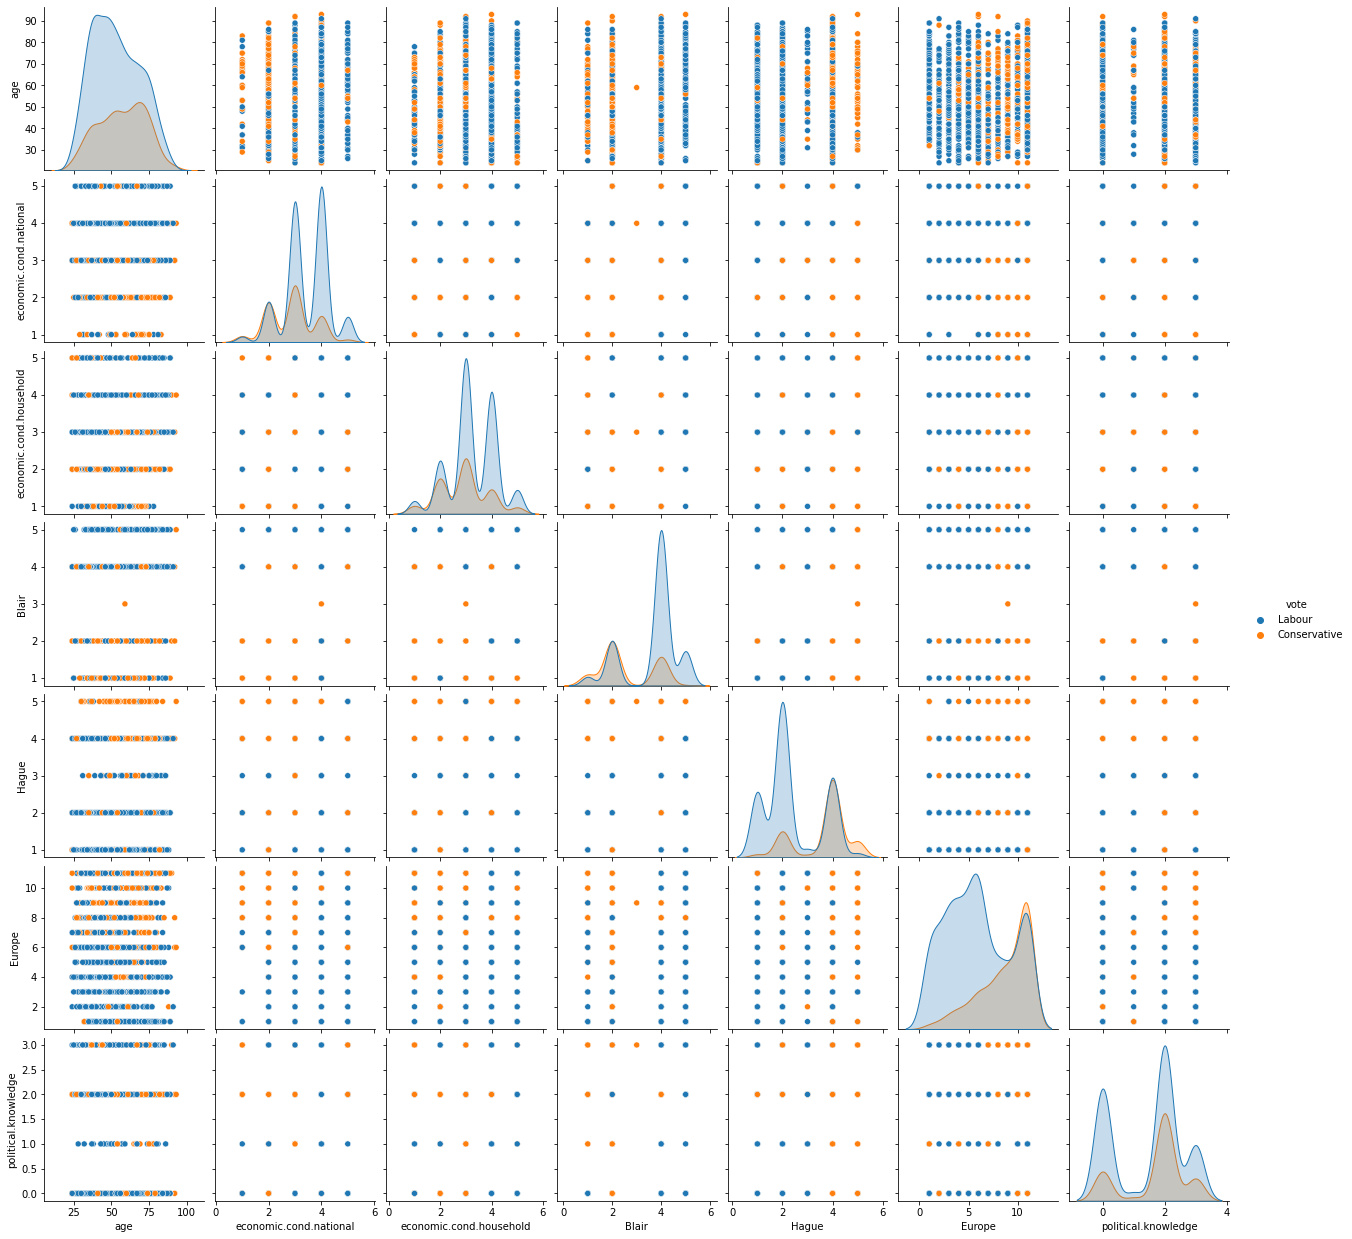

In [30]:
sns.pairplot(election, hue='vote')

<AxesSubplot:>

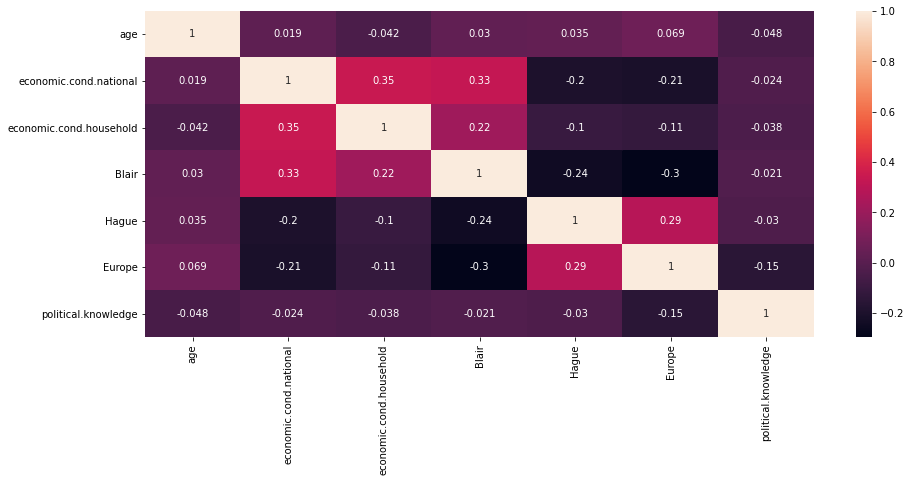

In [31]:
plt.figure(figsize=(15,6))
sns.heatmap(election.corr(),annot=True)

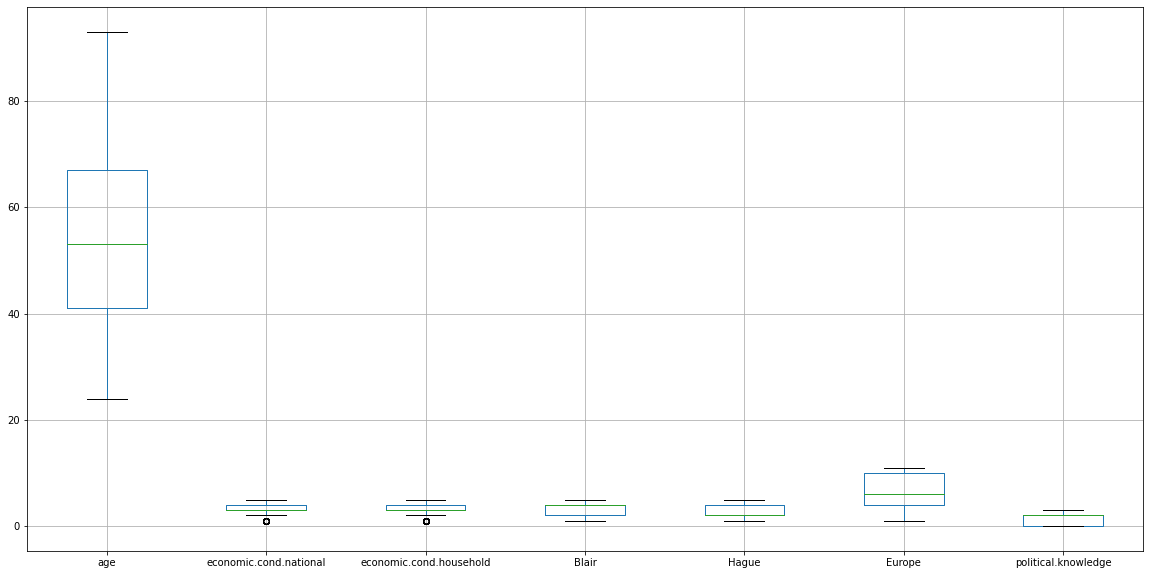

In [32]:
plt.figure(figsize=(20,10))
election.boxplot()
plt.show()

In [33]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [34]:
cat1 = ['vote', 'gender']

In [35]:
df =pd.get_dummies(election, columns=cat1,drop_first=True)

In [36]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [37]:
df= df.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)

In [38]:
df.sample(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
1041,78,4,4,2,2,10,0,0,0
919,38,3,2,4,4,2,2,1,1
892,66,4,3,2,1,6,3,1,0
688,50,2,4,2,5,11,2,0,0
52,51,4,3,5,4,1,2,1,1
1345,69,3,3,2,4,11,2,1,0
418,46,2,2,2,2,11,2,0,1
1340,42,3,3,2,2,11,0,1,0
1379,62,3,3,2,4,11,2,0,1
138,49,3,3,2,5,10,3,0,1


In [39]:
X=df.drop('IsLabour_or_not',axis=1)
Y=df['IsLabour_or_not']

In [40]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [42]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [43]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



the auc 0.886 


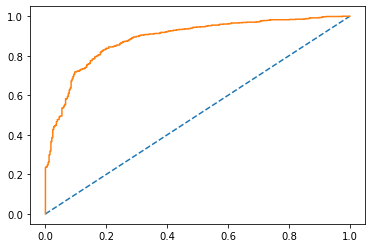

In [44]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [45]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc curve 0.885 


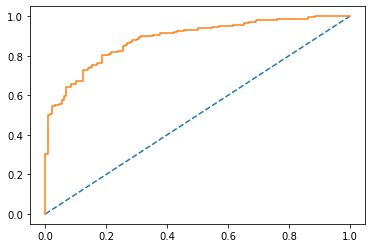

In [46]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


In [47]:
x= df.drop('IsLabour_or_not',axis=1)

y=df['IsLabour_or_not']

In [48]:
x.head()


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [49]:
from scipy.stats import zscore

In [50]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)


In [51]:
x.head(10)


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169
5,-0.457295,-0.279218,0.924730,0.566716,1.018544,-0.827714,0.422643,1.067169
6,0.179402,-1.414704,-1.226625,0.566716,1.018544,1.295778,0.422643,1.067169
7,1.452797,-0.279218,0.924730,0.566716,-1.419886,-1.737782,-1.424148,1.067169
8,-0.966652,-0.279218,-0.150948,0.566716,1.018544,1.295778,-1.424148,-0.937059
9,1.007109,-0.279218,-1.226625,1.418187,-1.419886,1.295778,0.422643,1.067169


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [55]:
print(KNN_model_score)

0.8678915135608049


In [56]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[263  88]
 [ 63 729]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.83      0.84      1143
weighted avg       0.87      0.87      0.87      1143



the auc 0.932 


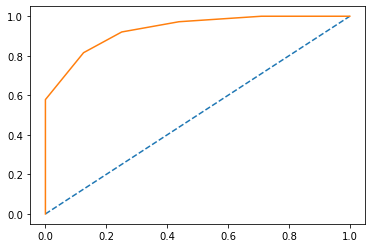

In [57]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [58]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)

0.824607329842932


In [59]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 81  30]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



the auc curve 0.870 


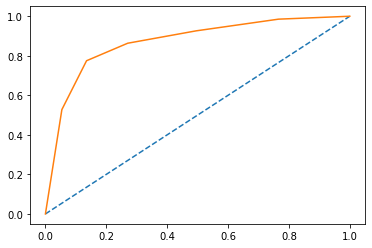

In [60]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [61]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [62]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8530183727034121
[[253  98]
 [ 70 722]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       351
           1       0.88      0.91      0.90       792

    accuracy                           0.85      1143
   macro avg       0.83      0.82      0.82      1143
weighted avg       0.85      0.85      0.85      1143



the auc 0.920 


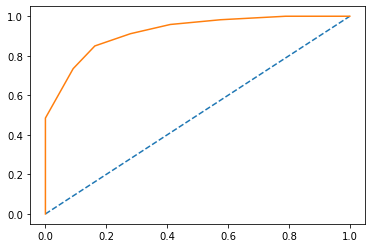

In [63]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [64]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8350785340314136
[[ 84  27]
 [ 36 235]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       111
           1       0.90      0.87      0.88       271

    accuracy                           0.84       382
   macro avg       0.80      0.81      0.80       382
weighted avg       0.84      0.84      0.84       382



the auc curve 0.882 


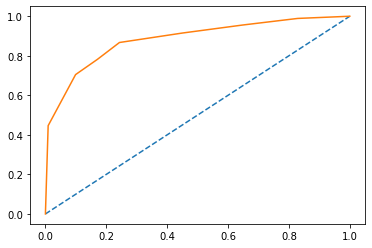

In [65]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [66]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE


[0.23298429319371727,
 0.19633507853403143,
 0.17539267015706805,
 0.16492146596858637,
 0.17801047120418845,
 0.17277486910994766,
 0.17539267015706805,
 0.18586387434554974,
 0.17801047120418845,
 0.17277486910994766]

In [67]:
ac_score

[0.7670157068062827,
 0.8036649214659686,
 0.824607329842932,
 0.8350785340314136,
 0.8219895287958116,
 0.8272251308900523,
 0.824607329842932,
 0.8141361256544503,
 0.8219895287958116,
 0.8272251308900523]

the auc curve 0.904 


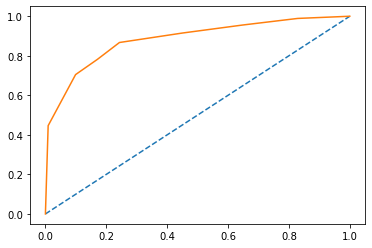

In [68]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


the auc curve 0.900 


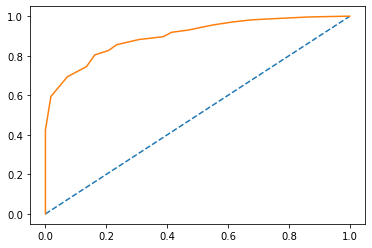

In [69]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

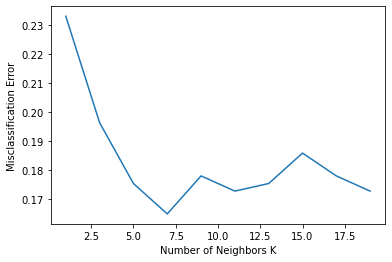

In [70]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [72]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [73]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



the auc 0.889 


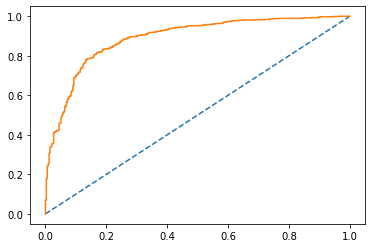

In [74]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [75]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



the auc curve 0.884 


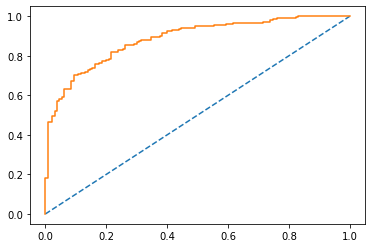

In [76]:

probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [79]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [80]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()


,0,1
0,0.616214,0.383786
1,0.186461,0.813539
2,0.187993,0.812007
3,0.163937,0.836063
4,0.052483,0.947517


In [81]:
Logistic_model.score(X_train,Y_train)

0.8406747891283973

AUC: 0.889


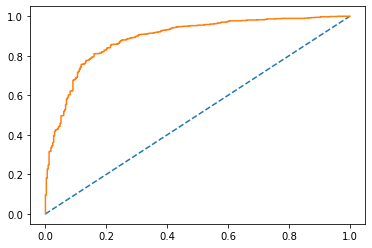

In [82]:
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [83]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [84]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.933649,0.066351
1,0.689194,0.310806
2,0.333481,0.666519
3,0.477407,0.522593
4,0.157152,0.842848


AUC: 0.882


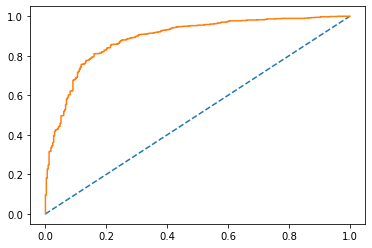

In [85]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [88]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [89]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



AUC: 1.000


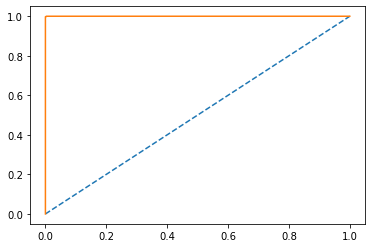

In [90]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [91]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.7969432314410481
[[ 83  47]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



AUC: 0.877


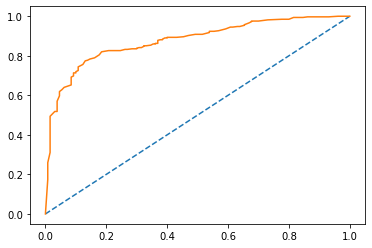

In [92]:

probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [95]:

y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


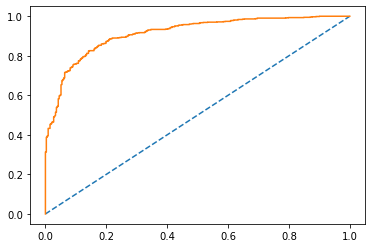

In [96]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [98]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.8865979381443299
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



AUC: 0.950


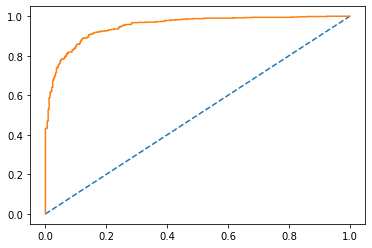

In [99]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [100]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8187772925764192
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.879


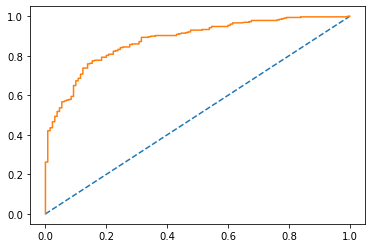

In [101]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [102]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8318777292576419
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.904


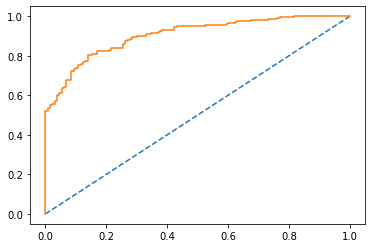

In [103]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

In [104]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')


[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/dineshyadav/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [105]:
df_Roosevelt=inaugural.raw('1941-Roosevelt.txt')

In [106]:
type(df_Roosevelt)

str

In [107]:
split_df_Roosevelt= df_Roosevelt.split('\n\n')

In [108]:
type(split_df_Roosevelt)

list

In [109]:
df_text_Roosevelt= pd.DataFrame(split_df_Roosevelt)

In [110]:
df_text_Roosevelt.columns=['speech']

In [111]:
df_text_Roosevelt.head(10)

,speech
0,On each national day of inauguration since 178...
1,In Washington's day the task of the people was...
2,In Lincoln's day the task of the people was to...
3,In this day the task of the people is to save ...
4,"To us there has come a time, in the midst of s..."
5,Lives of nations are determined not by the cou...
6,There are men who doubt this. There are men wh...
7,But we Americans know that this is not true.
8,"Eight years ago, when the life of this Republi..."
9,These later years have been living years -- fr...


In [112]:
df_text_Roosevelt.shape

(38, 1)

In [187]:
df_text_Roosevelt['word_count']= df_text_Roosevelt['speech'].apply(lambda x:len(str(x).split(" ")))

In [185]:
df_text_Roosevelt[['speech','word_count']].head()

,speech,word_count
0,national day inauguration since 1789 people re...,11
1,washingtons day task people create weld together,7
2,lincolns day task people preserve disruption w...,7
3,day task people save institutions disruption w...,7
4,us come time midst swift happenings pause mome...,22


In [188]:
all_words_Roosevelt= inaugural.words('1941-Roosevelt.txt')
length_all_words_Roosevelt=len(all_words_Roosevelt)
print("Length of all words in text 1941-Roosevelt is",length_all_words_Roosevelt)

Length of all words in text 1941-Roosevelt is 1536


In [115]:
df_text_Roosevelt['char_count']= df_text_Roosevelt['speech'].str.len()
df_text_Roosevelt[['speech','char_count']].head()

,speech,char_count
0,On each national day of inauguration since 178...,120
1,In Washington's day the task of the people was...,84
2,In Lincoln's day the task of the people was to...,96
3,In this day the task of the people is to save ...,108
4,"To us there has come a time, in the midst of s...",248


In [116]:
all_sents_Roosevelt= inaugural.sents('1941-Roosevelt.txt')
length_all_sents_Roosevelt=len('all_sents_Roosevelt')
length_all_sents_Roosevelt

19

In [117]:
df_text_Roosevelt['sent_count']= df_text_Roosevelt['speech'].str.len()
df_text_Roosevelt[['speech','sent_count']].head()

,speech,sent_count
0,On each national day of inauguration since 178...,120
1,In Washington's day the task of the people was...,84
2,In Lincoln's day the task of the people was to...,96
3,In this day the task of the people is to save ...,108
4,"To us there has come a time, in the midst of s...",248


In [118]:
def avg_word(sentence): 
    words= sentence.split() 
    return (sum (len(word) for word in words)/len(words))

df_text_Roosevelt['avg_word']= df_text_Roosevelt['speech'].apply(lambda x: avg_word(x))
df_text_Roosevelt[['speech','avg_word']].head()

,speech,avg_word
0,On each national day of inauguration since 178...,5.050000
1,In Washington's day the task of the people was...,4.312500
2,In Lincoln's day the task of the people was to...,4.705882
3,In this day the task of the people is to save ...,4.450000
4,"To us there has come a time, in the midst of s...",3.698113


In [119]:
inaugural.raw('1961-Kennedy.txt')


'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [120]:
df_Kennedy=inaugural.raw('1961-Kennedy.txt')

In [121]:
type(df_Kennedy)

str

In [122]:
split_df_Kennedy= df_Kennedy.split('\n\n')

In [123]:
type(split_df_Kennedy)

list

In [124]:
df_text_Kennedy= pd.DataFrame(split_df_Kennedy)

In [125]:
df_text_Kennedy.columns=['speech']

In [126]:
df_text_Kennedy.head(10)

,speech
0,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1,The world is very different now. For man holds...
2,We dare not forget today that we are the heirs...
3,"Let every nation know, whether it wishes us we..."
4,This much we pledge -- and more.
5,To those old allies whose cultural and spiritu...
6,To those new States whom we welcome to the ran...
7,To those peoples in the huts and villages acro...
8,"To our sister republics south of our border, w..."
9,"To that world assembly of sovereign states, th..."


In [127]:
df_text_Kennedy.shape

(27, 1)

In [128]:
inaugural.words('1961-Kennedy.txt')

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [129]:
len(inaugural.words('1961-Kennedy.txt'))

1546

In [130]:
all_words_Kennedy= inaugural.words('1961-Kennedy.txt')
length_all_words_Kennedy=len(all_words_Kennedy)
print("Length of all words in text 1961-Kennedy is",length_all_words_Kennedy)

Length of all words in text 1961-Kennedy is 1546


In [131]:
df_text_Kennedy['word_count']= df_text_Kennedy['speech'].apply(lambda x:len(str(x).split(" ")))
df_text_Kennedy[['speech','word_count']].head()

,speech,word_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",73
1,The world is very different now. For man holds...,68
2,We dare not forget today that we are the heirs...,96
3,"Let every nation know, whether it wishes us we...",40
4,This much we pledge -- and more.,7


In [132]:
df_text_Kennedy['char_count']= df_text_Kennedy['speech'].str.len()
df_text_Kennedy[['speech','char_count']].head()

,speech,char_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",445
1,The world is very different now. For man holds...,355
2,We dare not forget today that we are the heirs...,512
3,"Let every nation know, whether it wishes us we...",217
4,This much we pledge -- and more.,32


In [133]:
all_sents_Kennedy= inaugural.sents('1961-Kennedy.txt')
length_all_sents_Kennedy=len('all_sents_Kennedy')
length_all_sents_Kennedy

17

In [134]:
df_text_Kennedy['sent_count']= df_text_Kennedy['speech'].str.len()
df_text_Kennedy[['speech','sent_count']].head()

,speech,sent_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",445
1,The world is very different now. For man holds...,355
2,We dare not forget today that we are the heirs...,512
3,"Let every nation know, whether it wishes us we...",217
4,This much we pledge -- and more.,32


In [135]:
def avg_word(sentence): 
    words= sentence.split()
    return (sum (len(word)for word in words)/len(words))

df_text_Kennedy['avg_word']= df_text_Kennedy['speech'].apply(lambda x: avg_word(x))
df_text_Kennedy[['speech','avg_word']].head()

,speech,avg_word
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5.109589
1,The world is very different now. For man holds...,4.235294
2,We dare not forget today that we are the heirs...,4.343750
3,"Let every nation know, whether it wishes us we...",4.450000
4,This much we pledge -- and more.,3.714286


In [136]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [137]:
df_Nixon=inaugural.raw('1973-Nixon.txt')

In [138]:
type(df_Nixon)

str

In [139]:
split_df_Nixon= df_Nixon.split('\n\n')

In [140]:
type(split_df_Nixon)

list

In [141]:
df_text_Nixon= pd.DataFrame(split_df_Nixon)
df_text_Nixon.columns=['speech']
df_text_Nixon.head(10)

,speech
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."
1,"When we met here four years ago, America was b..."
2,"As we meet here today, we stand on the thresho..."
3,The central question before us is: How shall w...
4,Let us resolve that this will be what it can b...
5,This past year saw far-reaching results from o...
6,The peace we seek in the world is not the flim...
7,It is important that we understand both the ne...
8,Unless we in America work to preserve the peac...
9,"Unless we in America work to preserve freedom,..."


In [142]:
df_text_Nixon.shape

(51, 1)

In [143]:
inaugural.words('1973-Nixon.txt')

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [144]:
all_words_Nixon= inaugural.words('1973-Nixon.txt')
length_all_words_Nixon=len(all_words_Nixon)
print("Length of all words in text 1973-Nixon is",length_all_words_Nixon)

Length of all words in text 1973-Nixon is 2028


In [145]:
df_text_Nixon['word_count']= df_text_Nixon['speech'].apply(lambda x:len(str(x).split(" ")))
df_text_Nixon[['speech','word_count']].head()

,speech,word_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",25
1,"When we met here four years ago, America was b...",27
2,"As we meet here today, we stand on the thresho...",19
3,The central question before us is: How shall w...,51
4,Let us resolve that this will be what it can b...,38


In [146]:
df_text_Nixon['char_count']= df_text_Nixon['speech'].str.len()
df_text_Nixon[['speech','char_count']].head()

,speech,char_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",155
1,"When we met here four years ago, America was b...",156
2,"As we meet here today, we stand on the thresho...",84
3,The central question before us is: How shall w...,269
4,Let us resolve that this will be what it can b...,199


In [147]:
all_sents_Nixon= inaugural.sents('1973-Nixon.txt')
length_all_sents_Nixon=len('all_sents_Nixon')
length_all_sents_Nixon

15

In [148]:
def avg_word(sentence): 
    words= sentence.split() 
    return(sum (len(word)for word in words)/len(words))

df_text_Nixon['avg_word']= df_text_Nixon['speech'].apply(lambda x: avg_word(x))
df_text_Nixon[['speech','avg_word']].head()

,speech,avg_word
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",5.240000
1,"When we met here four years ago, America was b...",4.814815
2,"As we meet here today, we stand on the thresho...",3.473684
3,The central question before us is: How shall w...,4.294118
4,Let us resolve that this will be what it can b...,4.263158


In [149]:
df_text_Roosevelt['speech'] = df_text_Roosevelt['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_text_Roosevelt['speech'].head()
df_text_Roosevelt['speech'].str.replace('[^\w\s]','')

<ipython-input-149-b153c141f070>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Roosevelt['speech'].str.replace('[^\w\s]','')


0     on each national day of inauguration since 178...
1     in washingtons day the task of the people was ...
2     in lincolns day the task of the people was to ...
3     in this day the task of the people is to save ...
4     to us there has come a time in the midst of sw...
5     lives of nations are determined not by the cou...
6     there are men who doubt this there are men who...
7           but we americans know that this is not true
8     eight years ago when the life of this republic...
9     these later years have been living years  frui...
10    most vital to our present and our future is th...
11    for action has been taken within the threeway ...
12                               democracy is not dying
13    we know it because we have seen it reviveand grow
14    we know it cannot die  because it is built on ...
15    we know it because democracy alone of all form...
16    we know it because democracy alone has constru...
17    we know it because if we look below the su

In [150]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_text_Roosevelt['speech'] = df_text_Roosevelt['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_text_Roosevelt['speech'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dineshyadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    national day inauguration since 1789, people r...
1    washington's day task people create weld toget...
2    lincoln's day task people preserve nation disr...
3    day task people save nation institutions disru...
4    us come time, midst swift happenings, pause mo...
Name: speech, dtype: object

In [151]:
df_text_Roosevelt['word_count']= df_text_Roosevelt['speech'].apply(lambda x:len(str(x).split(" ")))
df_text_Roosevelt[['speech','word_count']].head()

,speech,word_count
0,"national day inauguration since 1789, people r...",11
1,washington's day task people create weld toget...,8
2,lincoln's day task people preserve nation disr...,8
3,day task people save nation institutions disru...,8
4,"us come time, midst swift happenings, pause mo...",23


In [152]:
df_text_Roosevelt['speech'][0]

'national day inauguration since 1789, people renewed sense dedication united states.'

In [153]:
df_text_Kennedy['speech'] = df_text_Kennedy['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_text_Kennedy['speech'].head()
df_text_Kennedy['speech'].str.replace('[^\w\s]','')

<ipython-input-153-d48fd29229aa>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Kennedy['speech'].str.replace('[^\w\s]','')


0     vice president johnson mr speaker mr chief jus...
1     the world is very different now for man holds ...
2     we dare not forget today that we are the heirs...
3     let every nation know whether it wishes us wel...
4                         this much we pledge  and more
5     to those old allies whose cultural and spiritu...
6     to those new states whom we welcome to the ran...
7     to those peoples in the huts and villages acro...
8     to our sister republics south of our border we...
9     to that world assembly of sovereign states the...
10    finally to those nations who would make themse...
11    we dare not tempt them with weakness for only ...
12    but neither can two great and powerful groups ...
13    so let us begin anew  remembering on both side...
14    let both sides explore what problems unite us ...
15    let both sides for the first time formulate se...
16    let both sides seek to invoke the wonders of s...
17    let both sides unite to heed in all corner

In [154]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_text_Kennedy['speech'] = df_text_Kennedy['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_text_Kennedy['speech'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dineshyadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    vice president johnson, mr. speaker, mr. chief...
1    world different now. man holds mortal hands po...
2    dare forget today heirs first revolution. let ...
3    let every nation know, whether wishes us well ...
4                                 much pledge -- more.
Name: speech, dtype: object

In [155]:
df_text_Kennedy['word_count']= df_text_Kennedy['speech'].apply(lambda x:len(str(x).split(" ")))
df_text_Kennedy[['speech','word_count']].head()

,speech,word_count
0,"vice president johnson, mr. speaker, mr. chief...",48
1,world different now. man holds mortal hands po...,33
2,dare forget today heirs first revolution. let ...,48
3,"let every nation know, whether wishes us well ...",25
4,much pledge -- more.,4


In [156]:
df_text_Kennedy['speech'][0]

'vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, observe today victory party, celebration freedom -- symbolizing end, well beginning -- signifying renewal, well change. sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago.'

In [157]:
df_text_Nixon['speech'] = df_text_Nixon['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_text_Nixon['speech'].head()
df_text_Nixon['speech'].str.replace('[^\w\s]','')

<ipython-input-157-c9c8851d5e9e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Nixon['speech'].str.replace('[^\w\s]','')


0     mr vice president mr speaker mr chief justice ...
1     when we met here four years ago america was bl...
2     as we meet here today we stand on the threshol...
3     the central question before us is how shall we...
4     let us resolve that this will be what it can b...
5     this past year saw farreaching results from ou...
6     the peace we seek in the world is not the flim...
7     it is important that we understand both the ne...
8     unless we in america work to preserve the peac...
9     unless we in america work to preserve freedom ...
10    but let us clearly understand the new nature o...
11              we shall respect our treaty commitments
12    we shall support vigorously the principle that...
13    we shall continue in this era of negotiation t...
14    we shall do our share in defending peace and f...
15    the time has passed when america will make eve...
16    just as we respect the right of each nation to...
17    just as americas role is indispensable in 

In [158]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_text_Nixon['speech'] = df_text_Nixon['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_text_Nixon['speech'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dineshyadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    mr. vice president, mr. speaker, mr. chief jus...
1    met four years ago, america bleak spirit, depr...
2     meet today, stand threshold new era peace world.
3    central question us is: shall use peace? let u...
4    let us resolve become: time great responsibili...
Name: speech, dtype: object

In [159]:
df_text_Nixon['word_count']= df_text_Nixon['speech'].apply(lambda x:len(str(x).split(" ")))
df_text_Nixon[['speech','word_count']].head()

,speech,word_count
0,"mr. vice president, mr. speaker, mr. chief jus...",19
1,"met four years ago, america bleak spirit, depr...",16
2,"meet today, stand threshold new era peace world.",8
3,central question us is: shall use peace? let u...,26
4,let us resolve become: time great responsibili...,17


In [160]:
df_text_Nixon['speech'][0]

'mr. vice president, mr. speaker, mr. chief justice, senator cook, mrs. eisenhower, fellow citizens great good country share together:'

In [161]:
df_text_Roosevelt['speech']= df_text_Roosevelt['speech'].str.replace('[^\w\s]','')
df_text_Roosevelt[['speech']].head()

<ipython-input-161-e00d8300f2a7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Roosevelt['speech']= df_text_Roosevelt['speech'].str.replace('[^\w\s]','')


,speech
0,national day inauguration since 1789 people re...
1,washingtons day task people create weld togeth...
2,lincolns day task people preserve nation disru...
3,day task people save nation institutions disru...
4,us come time midst swift happenings pause mome...


In [162]:
Freq_Roosevelt= pd.Series(' '.join(df_text_Roosevelt['speech']).split()).value_counts()[:3]
Freq_Roosevelt

nation    11
know      10
spirit     9
dtype: int64

In [163]:
df_text_Roosevelt['speech'] = df_text_Roosevelt['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in Freq_Roosevelt))
df_text_Roosevelt['speech'].head()

0    national day inauguration since 1789 people re...
1     washingtons day task people create weld together
2    lincolns day task people preserve disruption w...
3    day task people save institutions disruption w...
4    us come time midst swift happenings pause mome...
Name: speech, dtype: object

In [164]:
df_text_Kennedy['speech']= df_text_Kennedy['speech'].str.replace('[^\w\s]','')
df_text_Kennedy[['speech']].head()

<ipython-input-164-67671e6c8111>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Kennedy['speech']= df_text_Kennedy['speech'].str.replace('[^\w\s]','')


,speech
0,vice president johnson mr speaker mr chief jus...
1,world different now man holds mortal hands pow...
2,dare forget today heirs first revolution let w...
3,let every nation know whether wishes us well i...
4,much pledge more


In [165]:
Freq_Kennedy= pd.Series(' '.join(df_text_Kennedy['speech']).split()).value_counts()[:3]
Freq_Kennedy

let      16
us       12
sides     8
dtype: int64

In [166]:
df_text_Kennedy['speech'] = df_text_Kennedy['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in Freq_Kennedy))
df_text_Kennedy['speech'].head()

0    vice president johnson mr speaker mr chief jus...
1    world different now man holds mortal hands pow...
2    dare forget today heirs first revolution word ...
3    every nation know whether wishes well ill shal...
4                                     much pledge more
Name: speech, dtype: object

In [167]:
df_text_Nixon['speech']= df_text_Nixon['speech'].str.replace('[^\w\s]','')
df_text_Nixon[['speech']].head()

<ipython-input-167-a4bf4a76ca1f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Nixon['speech']= df_text_Nixon['speech'].str.replace('[^\w\s]','')


,speech
0,mr vice president mr speaker mr chief justice ...
1,met four years ago america bleak spirit depres...
2,meet today stand threshold new era peace world
3,central question us is shall use peace let us ...
4,let us resolve become time great responsibilit...


In [168]:
Freq_Nixon= pd.Series(' '.join(df_text_Nixon['speech']).split()).value_counts()[:3]
Freq_Nixon

us       26
let      22
peace    19
dtype: int64

In [169]:
df_text_Nixon['speech'] = df_text_Nixon['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in Freq_Nixon))
df_text_Nixon['speech'].head()

0    mr vice president mr speaker mr chief justice ...
1    met four years ago america bleak spirit depres...
2             meet today stand threshold new era world
3    central question is shall use resolve era ente...
4    resolve become time great responsibilities gre...
Name: speech, dtype: object

In [170]:
stop_words= list(stopwords.words('english'))


In [171]:
corpus_Roosevelt= df_text_Roosevelt['speech'].apply(lambda x:' '.join([z for z in x.split() if z not in stop_words]))
corpus_Roosevelt

0     national day inauguration since 1789 people re...
1      washingtons day task people create weld together
2     lincolns day task people preserve disruption w...
3     day task people save institutions disruption w...
4     us come time midst swift happenings pause mome...
5     lives nations determined count years lifetime ...
6     men doubt men believe democracy form governmen...
7                                        americans true
8     eight years ago life republic seemed frozen fa...
9     later years living years fruitful years people...
10    vital present future experience democracy succ...
11    action taken within threeway framework constit...
12                                      democracy dying
13                                  seen reviveand grow
14    cannot die built unhampered initiative individ...
15    democracy alone forms government enlists full ...
16    democracy alone constructed unlimited civiliza...
17    look surface sense still spreading every c

In [172]:
Word_Cloud_Roosevelt= ' '.join(corpus_Roosevelt)
Word_Cloud_Roosevelt

'national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together lincolns day task people preserve disruption within day task people save institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human life man threescore years ten little little less life fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material things vital present future experience democ

Word Cloud for President Roosevelt After Stop Word Removal)!!


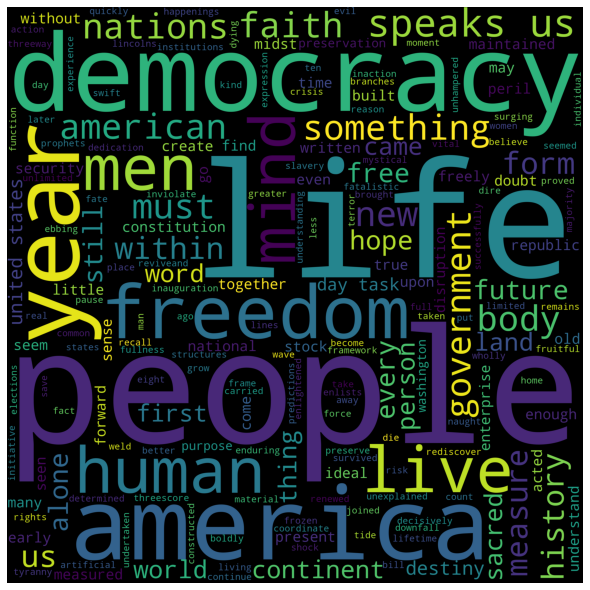

In [175]:
from wordcloud import WordCloud 
wordcloud= WordCloud(width= 3000, height= 3000,
                     background_color='black', 
                     min_font_size= 10, random_state=100).generate(Word_Cloud_Roosevelt) 

plt.figure(figsize= (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad= 0)
print("Word Cloud for President Roosevelt After Stop Word Removal)!!")
plt.show()

In [176]:
corpus_Kennedy= df_text_Kennedy['speech'].apply(lambda x:' '.join([z for z in x.split() if z not in stop_words]))
corpus_Kennedy

0     vice president johnson mr speaker mr chief jus...
1     world different man holds mortal hands power a...
2     dare forget today heirs first revolution word ...
3     every nation know whether wishes well ill shal...
4                                           much pledge
5     old allies whose cultural spiritual origins sh...
6     new states welcome ranks free pledge word one ...
7     peoples huts villages across globe struggling ...
8     sister republics south border offer special pl...
9     world assembly sovereign states united nations...
10    finally nations would make adversary offer ple...
11    dare tempt weakness arms sufficient beyond dou...
12    neither two great powerful groups nations take...
13    begin anew remembering civility sign weakness ...
14    explore problems unite instead belaboring prob...
15    first time formulate serious precise proposals...
16    seek invoke wonders science instead terrors to...
17    unite heed corners earth command isaiah un

In [177]:
Word_Cloud_Kennedy= ' '.join(corpus_Kennedy)
Word_Cloud_Kennedy

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success lib

Word Cloud for President Roosevelt After Stop Word Removal)!!


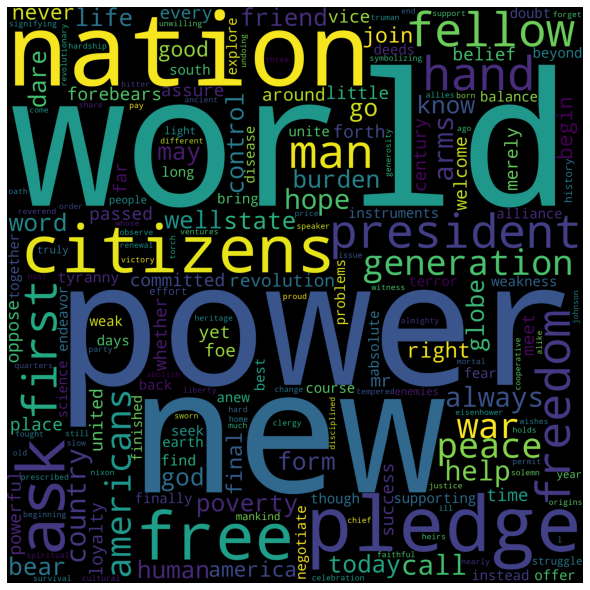

In [178]:
wordcloud= WordCloud(width= 3000, height= 3000,
                     background_color='black', 
                     min_font_size= 10, random_state=100).generate(Word_Cloud_Kennedy) 

plt.figure(figsize= (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad= 0)
print("Word Cloud for President Roosevelt After Stop Word Removal)!!")
plt.show()

In [179]:
corpus_Nixon= df_text_Nixon['speech'].apply(lambda x:' '.join([z for z in x.split() if z not in stop_words]))
corpus_Nixon

0     mr vice president mr speaker mr chief justice ...
1     met four years ago america bleak spirit depres...
2              meet today stand threshold new era world
3     central question shall use resolve era enter p...
4     resolve become time great responsibilities gre...
5     past year saw farreaching results new policies...
6     seek world flimsy merely interlude wars endure...
7     important understand necessity limitations ame...
8                          unless america work preserve
9          unless america work preserve freedom freedom
10    clearly understand new nature americas role re...
11                     shall respect treaty commitments
12    shall support vigorously principle country rig...
13    shall continue era negotiation work limitation...
14    shall share defending freedom world shall expe...
15    time passed america make every nations conflic...
16    respect right nation determine future also rec...
17    americas role indispensable preserving wor

In [180]:
Word_Cloud_Nixon= ' '.join(corpus_Nixon)
Word_Cloud_Nixon

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era world central question shall use resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting world seek world flimsy merely interlude wars endure generations come important understand necessity limitations americas role maintaining unless america work preserve unl

Word Cloud for President Roosevelt After Stop Word Removal)!!


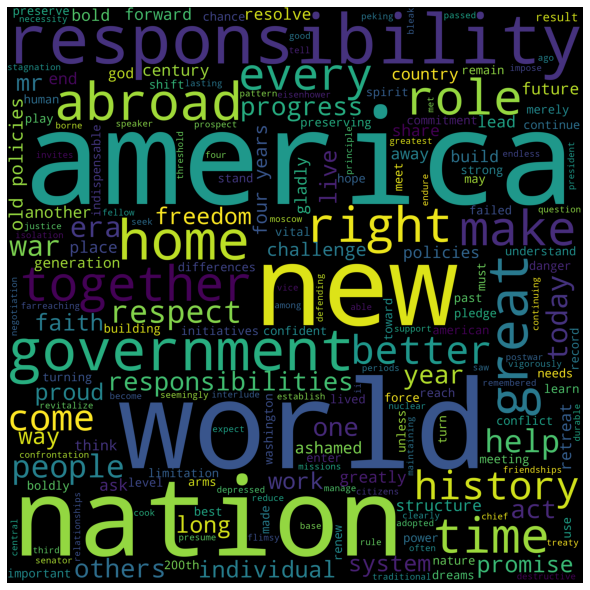

In [181]:
wordcloud= WordCloud(width= 3000, height= 3000,
                     background_color='black', 
                     min_font_size= 10, random_state=100).generate(Word_Cloud_Nixon) 

plt.figure(figsize= (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad= 0)
print("Word Cloud for President Roosevelt After Stop Word Removal)!!")
plt.show()